In [1]:
import pandas as pd

train = pd.read_csv('Datasets/train.csv')
test  = pd.read_csv('Datasets/testdata.csv')
 

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
#visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

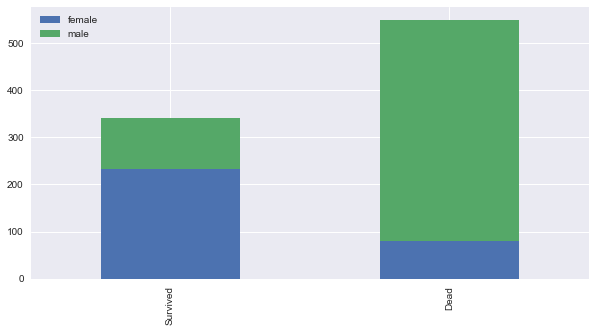

In [13]:
bar_chart('Sex')

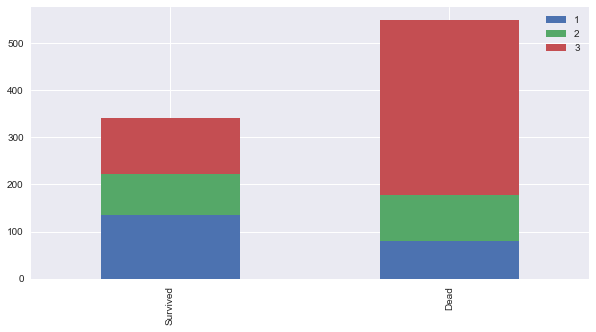

In [14]:
bar_chart('Pclass')

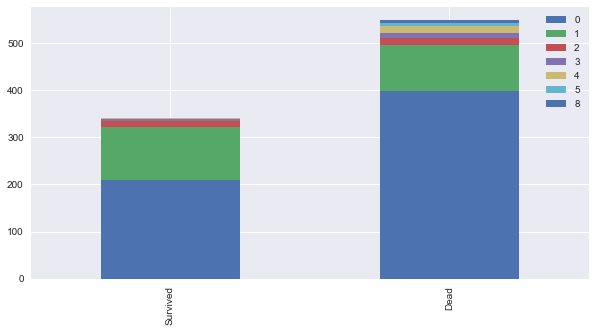

In [15]:
bar_chart('SibSp')

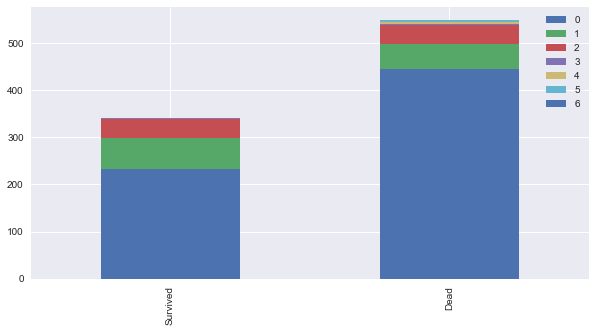

In [16]:
bar_chart('Parch')

In [17]:
#FEATURE ENGINEERING

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#Name

In [20]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Sir           1
Capt          1
Mme           1
Jonkheer      1
Don           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.83,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.00,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.69,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.66,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.29,NaN,S,Mrs


In [24]:
title_mapping = {"Mr" : 0 , "Miss" :1,"Mrs":2, "Master":3,
                 "Dr":3,"Rev":3,"Mlle":3,"Major":3,"Col":3,
                 "Capt":3,"Don":3,"Lady":3,"Mme":3,
                 "Jonkheer":3,"Countess":3,"Sir":3,"Ms":3,"Dona":3}
for dataset in train_test_data:
    dataset['Title']= dataset['Title'].map(title_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.Title.isnull().value_counts()

False    418
Name: Title, dtype: int64

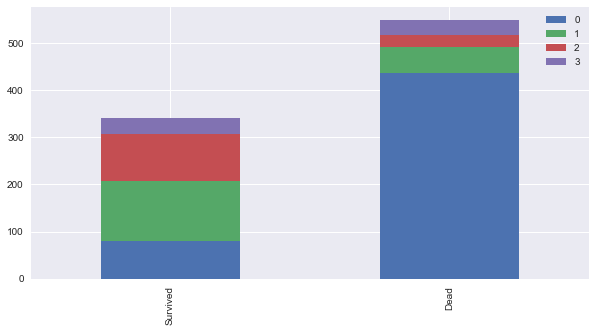

In [27]:
bar_chart('Title')

In [28]:
#Name feature is removed here
test.drop("Name", axis=1, inplace=True)
train.drop('Name', axis=1,inplace=True)

In [29]:

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.83,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.00,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.69,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.66,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.29,NaN,S,2


In [31]:
#Sex

In [32]:
sex_mapping={"male":0,'female':1}

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

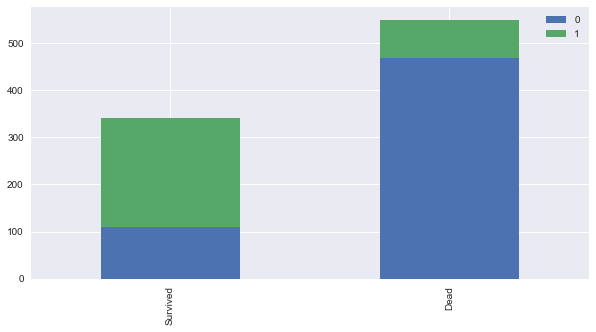

In [33]:
bar_chart('Sex')

In [34]:
#Age

In [35]:
#First fill all missing values 

In [36]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

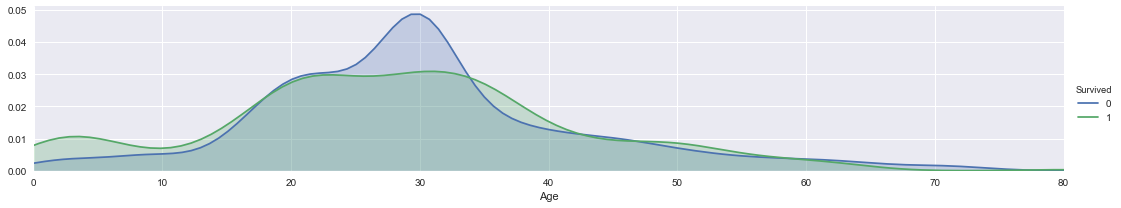

In [37]:
facet=sns.FacetGrid(train, hue = "Survived" , aspect=5)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(Xlim=(0,train['Age'].max()))
facet.add_legend()

# Binning
    converting  numerical age to categoical variable

In [38]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16.0,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1 ,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age'] = 3,
    dataset.loc[dataset['Age']>62,'Age'] = 4

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


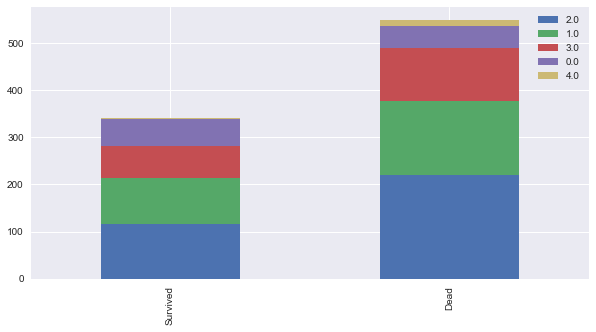

In [40]:
bar_chart('Age')

# Embarked

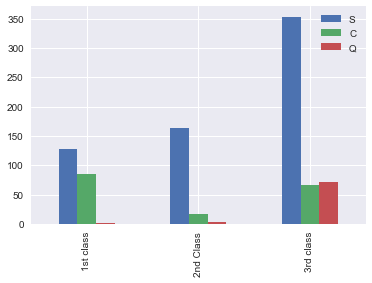

In [41]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd Class','3rd class']
df.plot(kind = 'bar')

In [42]:
train.Embarked.isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

more than 50% of class 1st, 2nd and 3rd are from S embark
* filling out missing value with s

In [43]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [44]:
train.Embarked.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [45]:
Embarked_mapping = {"S":0,"C":1,"Q":2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


# Fare

In [47]:
train.Fare.isnull().value_counts()


False    891
Name: Fare, dtype: int64

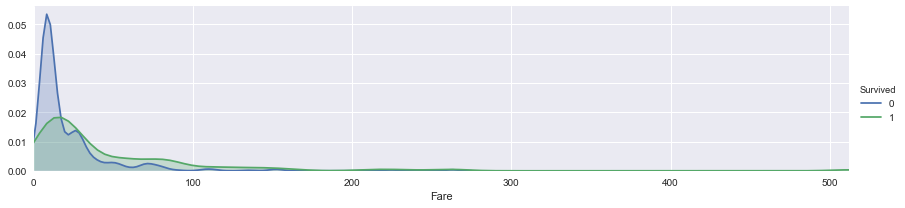

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot, 'Fare' , shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

In [49]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <=17.0 ,'Fare'] = 0
    dataset.loc[(dataset['Fare']>17.0) & (dataset['Fare']<=30.0),'Fare' ] = 1
    dataset.loc[(dataset['Fare']>30.0) & (dataset['Fare']<=100.0),'Fare'] = 2
    dataset.loc[ dataset['Fare']>100.0,'Fare'] = 3

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


# Cabin

In [51]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F2             3
E101           3
C22 C26        3
F33            3
D35            2
C2             2
B35            2
B22            2
E8             2
E44            2
E121           2
E24            2
C68            2
B58 B60        2
B5             2
D20            2
B28            2
C124           2
C52            2
C123           2
B49            2
C92            2
B77            2
D26            2
E33            2
D33            2
              ..
E50            1
A7             1
C62 C64        1
C70            1
B102           1
E12            1
B82 B84        1
D21            1
E46            1
C47            1
A36            1
D49            1
B69            1
C148           1
A24            1
A19            1
C46            1
B94            1
C54            1
B71            1
E17            1
C103           1
D45            1
D56            1
A32            1
A34            1
D19            1
A14           

In [52]:
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].str[:1]

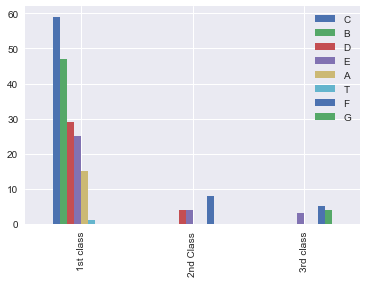

In [53]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd Class','3rd class']
df.plot(kind = 'bar')

In [54]:
cabin_mapping = {"A":0 , "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].map(cabin_mapping)

In [55]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace = True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace = True)

# FamilySize

In [56]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

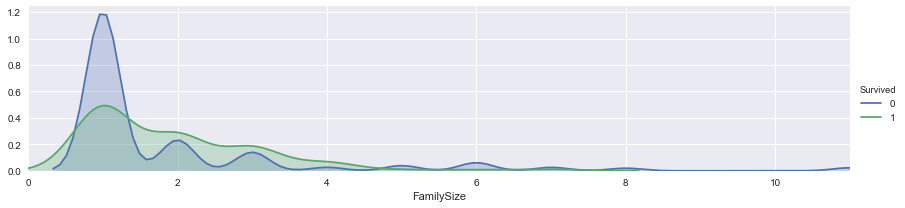

In [57]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

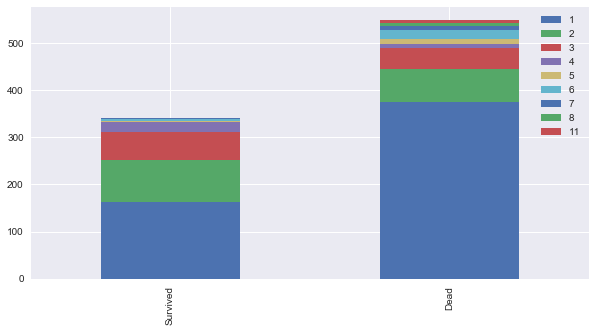

In [58]:
bar_chart('FamilySize')

In [59]:
train.Cabin.isnull().value_counts()

False    891
Name: Cabin, dtype: int64

# droping feature vector
ticket , SibSp ,Parch

In [60]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop,axis= 1)
train = train.drop(['PassengerId'], axis=1)

In [61]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


In [62]:
train.shape

(891, 9)

In [63]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


#  Modelling

In [79]:
from sklearn.svm import SVC
#from sklearn import svm

import numpy as np

In [80]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


# Cross Validation (K-Fold)

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [82]:
column_target = ['Survived']

In [83]:
column_train = ['Pclass', 'Sex','Age', 'Fare', 'Cabin', 'Embarked', 'Title' , 'FamilySize']


In [84]:
train_data = train[column_train]
target_data =train[column_target]

* SVM: Support Vector Machine

In [85]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf , train_data, np.ravel(target_data),cv=k_fold, n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.83146067 0.84269663 0.84269663 0.86516854]


In [86]:
round(np.mean(score)*100,2)

83.17

# Testing

In [87]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,3.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [88]:
clf =SVC()
clf.fit(train_data, np.ravel(target_data))

test_data = test.drop("PassengerId", axis =1)
prediction = clf.predict(test_data)

In [89]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv('submission.csv', index =False)

In [90]:
d=pd.read_csv('submission.csv')

In [91]:
d

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
